# Validity of using prescription records to identify patient comorbidities
## Combined Analysis of Anxiety and Depression

**ReadMe:**
- This is a script used in the analysis for Schnier et al., 2025: Validity of using prescription records to classify disease – a record linkage study using routinely collected electronic health records from the UK.
- The underlying data set has been created using the Optimum Patient Care Research Database (https://opcrd.optimumpatientcare.org/). The authors do not have permission to give the public access to the study dataset; researchers may request access to OPCRD for their own purposes. 
 - All code is run in StataSE 18. 


**Set up:**
|Var|Input|
| --- | --- | 
|population|425,000|
|diagnostic codes|combined code lists|
|drug codes|bnf selection 040101, 040102 and '0403%';|
|sql date|13.02.2025|
|sql code|anxdepselection_202050318.sql| 

In [49]:
    clear all

### Import from SQL server and data wrangling

In [50]:
odbc load, exec("select * from [anxdep_425000_20250313]") dsn("sqlserverconnect")

In [51]:
generate test=0 if missing(drug_dt)
replace test=1 if ! missing(drug_dt)  

generate diag=0 if missing(diag_dt)
replace diag=1 if ! missing(diag_dt)  

gen start_year=year(fu_start_dt)


egen agecat = cut(age), at(16,30,70,120)
label def agecat_lab 16 "Young" 30 "0Middle" 70 "Elderly" 120 "weird"
label values agecat agecat_lab

egen yearcat = cut(start_year), at(2004,2010,2016,2025)
label def yearcat_lab 2004 "2004-2009" 2010 "2010-2015" 2016 "2016-2020" 
label values yearcat yearcat_lab

egen imdcat = cut(imd_decile), at(0,4,8,11)
label def imdcat_lab 0 "1-3" 4 "4-7" 8 "8-10" 
label values imdcat imdcat_lab

replace bnf_code = "Hypnotics" if bnf_code== "040101"
replace bnf_code = "Anxiolytics" if bnf_code== "040102"
replace bnf_code = "Tricyclic" if bnf_code== "040301"
replace bnf_code = "Monoamine-oxidase inhibitor" if bnf_code== "040302"
replace bnf_code = "Serotonin re-uptake inhibitors" if bnf_code== "040303"
replace bnf_code = "Other antidepressant" if bnf_code== "040304"
replace bnf_code = "Other/unknown" if missing(bnf_code) & ! missing(drug_dt)
replace bnf_code = "Other/unknown" if bnf_code=="030401" 


replace ethnicity="0white" if ethnicity=="1"
replace ethnicity="Other" if ethnicity=="2"
replace ethnicity="Other" if ethnicity=="3"
replace ethnicity="Other" if ethnicity=="4"
replace ethnicity="Other" if ethnicity=="5"
replace ethnicity="Missing" if ethnicity=="99"


encode bnf_code, generate(bnf_code_values) 
encode description, generate(description_values)
encode ethnicity, generate(ethnicity_values) 

gen diag_neg=diag==0
gen diag_pos=diag==1
encode region_name, generate(region) label(regionlbl)
encode ethnicity, generate(ethnic)


(109,412 missing values generated)
(109,412 real changes made)
(41,333 missing values generated)
(41,333 real changes made)
(2,589 missing values generated)
variable bnf_code was str6 now str9
(15,001 real changes made)
variable bnf_code was str9 now str11
(13,070 real changes made)
(25,573 real changes made)
variable bnf_code was str11 now str27
(33 real changes made)
variable bnf_code was str27 now str30
(46,138 real changes made)
(9,310 real changes made)
(186 real changes made)
(91 real changes made)
variable ethnicity was str2 now str6
(257,981 real changes made)
(3,762 real changes made)
(23,912 real changes made)
(7,430 real changes made)
(8,764 real changes made)
variable ethnicity was str6 now str7
(123,151 real changes made)


(bin=19, start=16, width=5)


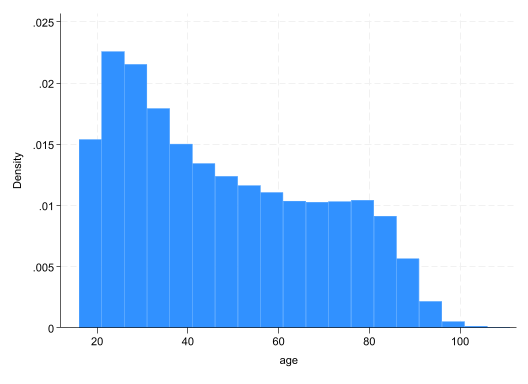

In [52]:
histogram age, width(5)


This table holds one randomly selected diagnostic code found during the observation period. The table is truncated to only include diagnostic codes with a count of 10 or more.

In [53]:
set linesize 132
groups description , select(f >= 10) ord(h) table 


  +---------------------------------------------------------------------------------------------------------------------------------
> -------------------------+
  | description                                                                                                                     
>  Freq.   Percent     %<= |
  |---------------------------------------------------------------------------------------------------------------------------------
> -------------------------|
  | Depression                                                                                                                      
>   7104     17.19   17.19 |
  | Mixed anxiety and depressive disorder                                                                                           
>   6621     16.02   33.21 |
  | Anxiety disorder                                                                                                                
>   3513      8.50   41.71 |
  | Anxiety                

These tables holds one randomly selected prescrption during the observation period. The table is truncated to only include codes with a count of 10 or more.


In [54]:
set linesize 132
groups bnf_code , select(f >= 10) ord(h) table 


  +----------------------------------------------------------+
  |                       bnf_code   Freq.   Percent     %<= |
  |----------------------------------------------------------|
  | Serotonin re-uptake inhibitors   46138     42.17   42.17 |
  |                      Tricyclic   25573     23.37   65.54 |
  |                      Hypnotics   15001     13.71   79.25 |
  |                    Anxiolytics   13070     11.95   91.20 |
  |           Other antidepressant    9310      8.51   99.71 |
  |----------------------------------------------------------|
  |                  Other/unknown     277      0.25   99.96 |
  |    Monoamine-oxidase inhibitor      33      0.03   99.99 |
  +----------------------------------------------------------+


### Results
#### Overall

In [55]:
diagt diag test


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    34,995      6,338 |    41,333 
    Normal |    74,417    309,250 |   383,667 
-----------+----------------------+----------
     Total |   109,412    315,588 |   425,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.7%      9.6%       9.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     84.7%     84.3%     85.0%
Specificity                      Pr(-|N)     80.6%     80.5%     80.7%
ROC area               (Sens. + Spec.)/2      0.83      0.82      0.83 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      4.37      4.

#### Males

In [56]:
diagt diag test if sex==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    12,671      2,402 |    15,073 
    Normal |    29,128    164,084 |   193,212 
-----------+----------------------+----------
     Total |    41,799    166,486 |   208,285 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      7.2%      7.1%       7.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     84.1%     83.5%     84.6%
Specificity                      Pr(-|N)     84.9%     84.8%     85.1%
ROC area               (Sens. + Spec.)/2      0.84      0.84      0.85 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      5.58      5.

#### Females

In [57]:
diagt diag test if sex==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    22,322      3,936 |    26,258 
    Normal |    45,287    145,161 |   190,448 
-----------+----------------------+----------
     Total |    67,609    149,097 |   216,706 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     12.1%     12.0%      12.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     85.0%     84.6%     85.4%
Specificity                      Pr(-|N)     76.2%     76.0%     76.4%
ROC area               (Sens. + Spec.)/2      0.81      0.80      0.81 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      3.57      3.

#### Age
*16-29*

In [58]:
diagt diag test if agecat==16


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    10,422      2,700 |    13,122 
    Normal |    10,561     93,991 |   104,552 
-----------+----------------------+----------
     Total |    20,983     96,691 |   117,674 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     11.2%     11.0%      11.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     79.4%     78.7%     80.1%
Specificity                      Pr(-|N)     89.9%     89.7%     90.1%
ROC area               (Sens. + Spec.)/2      0.85      0.84      0.85 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      7.86      7.

*30-69*

In [59]:
diagt diag test if agecat==30


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    19,354      2,891 |    22,245 
    Normal |    39,504    159,646 |   199,150 
-----------+----------------------+----------
     Total |    58,858    162,537 |   221,395 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.0%      9.9%      10.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     87.0%     86.6%     87.4%
Specificity                      Pr(-|N)     80.2%     80.0%     80.3%
ROC area               (Sens. + Spec.)/2      0.84      0.83      0.84 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      4.39      4.

In [60]:
diagt diag test if agecat==70


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     5,219        747 |     5,966 
    Normal |    24,352     55,613 |    79,965 
-----------+----------------------+----------
     Total |    29,571     56,360 |    85,931 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      6.9%      6.8%       7.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     87.5%     86.6%     88.3%
Specificity                      Pr(-|N)     69.5%     69.2%     69.9%
ROC area               (Sens. + Spec.)/2      0.79      0.78      0.79 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      2.87      2.

#### Year at start of oberservation period 
*2004-2009*

In [61]:
diagt diag test if yearcat==2004


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    11,133      1,854 |    12,987 
    Normal |    25,210    111,803 |   137,013 
-----------+----------------------+----------
     Total |    36,343    113,657 |   150,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      8.7%      8.5%       8.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     85.7%     85.1%     86.3%
Specificity                      Pr(-|N)     81.6%     81.4%     81.8%
ROC area               (Sens. + Spec.)/2      0.84      0.83      0.84 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      4.66      4.

*2010-2015*

In [62]:
diagt diag test if yearcat==2010


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    11,915      2,121 |    14,036 
    Normal |    26,805    109,159 |   135,964 
-----------+----------------------+----------
     Total |    38,720    111,280 |   150,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.4%      9.2%       9.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     84.9%     84.3%     85.5%
Specificity                      Pr(-|N)     80.3%     80.1%     80.5%
ROC area               (Sens. + Spec.)/2      0.83      0.82      0.83 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      4.31      4.

*2016-2020*

In [63]:
diagt diag test if yearcat==2016


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    11,947      2,363 |    14,310 
    Normal |    22,402     88,288 |   110,690 
-----------+----------------------+----------
     Total |    34,349     90,651 |   125,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     11.4%     11.3%      11.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     83.5%     82.9%     84.1%
Specificity                      Pr(-|N)     79.8%     79.5%     80.0%
ROC area               (Sens. + Spec.)/2      0.82      0.81      0.82 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      4.13      4.

#### IMD of practice
*1-3*

In [64]:
diagt diag test if imdcat==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    12,438      2,344 |    14,782 
    Normal |    26,202    113,567 |   139,769 
-----------+----------------------+----------
     Total |    38,640    115,911 |   154,551 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.6%      9.4%       9.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     84.1%     83.5%     84.7%
Specificity                      Pr(-|N)     81.3%     81.0%     81.5%
ROC area               (Sens. + Spec.)/2      0.83      0.82      0.83 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      4.49      4.

*4-7*

In [65]:
diagt diag test if imdcat==4


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    12,320      2,023 |    14,343 
    Normal |    26,816    101,886 |   128,702 
-----------+----------------------+----------
     Total |    39,136    103,909 |   143,045 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.0%      9.9%      10.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     85.9%     85.3%     86.5%
Specificity                      Pr(-|N)     79.2%     78.9%     79.4%
ROC area               (Sens. + Spec.)/2      0.83      0.82      0.83 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      4.12      4.

*8-10*

In [66]:
diagt diag test if imdcat==8


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     9,976      1,905 |    11,881 
    Normal |    21,259     91,675 |   112,934 
-----------+----------------------+----------
     Total |    31,235     93,580 |   124,815 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.5%      9.4%       9.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     84.0%     83.3%     84.6%
Specificity                      Pr(-|N)     81.2%     80.9%     81.4%
ROC area               (Sens. + Spec.)/2      0.83      0.82      0.83 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      4.46      4.

#### Commissioning Regions
EAST OF ENGLAND

In [67]:
diagt diag test if regexm(region_name,"ENGLAND")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     7,843      1,287 |     9,130 
    Normal |    17,914     62,593 |    80,507 
-----------+----------------------+----------
     Total |    25,757     63,880 |    89,637 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.2%     10.0%      10.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     85.9%     85.2%     86.6%
Specificity                      Pr(-|N)     77.7%     77.5%     78.0%
ROC area               (Sens. + Spec.)/2      0.82      0.81      0.82 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      3.86      3.

London

In [68]:
diagt diag test if regexm(region_name,"LONDON")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       937        306 |     1,243 
    Normal |     1,651     13,831 |    15,482 
-----------+----------------------+----------
     Total |     2,588     14,137 |    16,725 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      7.4%      7.0%       7.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     75.4%     72.9%     77.8%
Specificity                      Pr(-|N)     89.3%     88.8%     89.8%
ROC area               (Sens. + Spec.)/2      0.82      0.81      0.84 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      7.07      6.

Midlands

In [69]:
diagt diag test if regexm(region_name,"MID")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     4,746        789 |     5,535 
    Normal |     8,396     32,612 |    41,008 
-----------+----------------------+----------
     Total |    13,142     33,401 |    46,543 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     11.9%     11.6%      12.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     85.7%     84.8%     86.7%
Specificity                      Pr(-|N)     79.5%     79.1%     79.9%
ROC area               (Sens. + Spec.)/2      0.83      0.82      0.83 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      4.19      4.

Yorkshire

In [70]:
diagt diag test if regexm(region_name,"YORK")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     6,420      1,259 |     7,679 
    Normal |    14,261     64,171 |    78,432 
-----------+----------------------+----------
     Total |    20,681     65,430 |    86,111 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      8.9%      8.7%       9.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     83.6%     82.8%     84.4%
Specificity                      Pr(-|N)     81.8%     81.5%     82.1%
ROC area               (Sens. + Spec.)/2      0.83      0.82      0.83 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      4.60      4.

North West

In [71]:
diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     4,594        970 |     5,564 
    Normal |     7,283     34,746 |    42,029 
-----------+----------------------+----------
     Total |    11,877     35,716 |    47,593 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     11.7%     11.4%      12.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     82.6%     81.5%     83.6%
Specificity                      Pr(-|N)     82.7%     82.3%     83.0%
ROC area               (Sens. + Spec.)/2      0.83      0.82      0.83 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      4.76      4.

South East

In [72]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     6,942      1,137 |     8,079 
    Normal |    15,239     67,167 |    82,406 
-----------+----------------------+----------
     Total |    22,181     68,304 |    90,485 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      8.9%      8.7%       9.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     85.9%     85.1%     86.7%
Specificity                      Pr(-|N)     81.5%     81.2%     81.8%
ROC area               (Sens. + Spec.)/2      0.84      0.83      0.84 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      4.65      4.

South West

In [73]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,680        432 |     3,112 
    Normal |     7,654     25,410 |    33,064 
-----------+----------------------+----------
     Total |    10,334     25,842 |    36,176 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      8.6%      8.3%       8.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     86.1%     84.9%     87.3%
Specificity                      Pr(-|N)     76.9%     76.4%     77.3%
ROC area               (Sens. + Spec.)/2      0.81      0.81      0.82 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      3.72      3.

#### System
SystmOne

In [74]:
diagt diag test if regexm(system,"One")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    17,995      2,916 |    20,911 
    Normal |    44,194    163,650 |   207,844 
-----------+----------------------+----------
     Total |    62,189    166,566 |   228,755 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.1%      9.0%       9.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     86.1%     85.6%     86.5%
Specificity                      Pr(-|N)     78.7%     78.6%     78.9%
ROC area               (Sens. + Spec.)/2      0.82      0.82      0.83 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      4.05      4.

Vision

In [75]:
diagt diag test if regexm(system,"Vision")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,000        182 |     1,182 
    Normal |     2,418     10,144 |    12,562 
-----------+----------------------+----------
     Total |     3,418     10,326 |    13,744 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      8.6%      8.1%       9.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     84.6%     82.4%     86.6%
Specificity                      Pr(-|N)     80.8%     80.1%     81.4%
ROC area               (Sens. + Spec.)/2      0.83      0.82      0.84 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      4.40      4.

EMIS

In [76]:
diagt diag test if regexm(ustrupper(system),"EMIS")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    15,987      3,239 |    19,226 
    Normal |    27,771    135,368 |   163,139 
-----------+----------------------+----------
     Total |    43,758    138,607 |   182,365 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.5%     10.4%      10.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     83.2%     82.6%     83.7%
Specificity                      Pr(-|N)     83.0%     82.8%     83.2%
ROC area               (Sens. + Spec.)/2      0.83      0.83      0.83 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      4.88      4.

#### RA_Index
Index==1

In [77]:
diagt diag test if RA_index==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    26,418      4,924 |    31,342 
    Normal |    54,941    235,414 |   290,355 
-----------+----------------------+----------
     Total |    81,359    240,338 |   321,697 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.7%      9.6%       9.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     84.3%     83.9%     84.7%
Specificity                      Pr(-|N)     81.1%     80.9%     81.2%
ROC area               (Sens. + Spec.)/2      0.83      0.82      0.83 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      4.45      4.

Index==0

In [78]:
diagt diag test if RA_index==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     8,577      1,414 |     9,991 
    Normal |    19,476     73,836 |    93,312 
-----------+----------------------+----------
     Total |    28,053     75,250 |   103,303 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.7%      9.5%       9.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     85.8%     85.1%     86.5%
Specificity                      Pr(-|N)     79.1%     78.9%     79.4%
ROC area               (Sens. + Spec.)/2      0.82      0.82      0.83 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      4.11      4.

#### Ethnicity
Ethnicity==0000white

In [79]:
diagt diag test if ethnicity=="0white"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    25,817      4,337 |    30,154 
    Normal |    52,639    175,188 |   227,827 
-----------+----------------------+----------
     Total |    78,456    179,525 |   257,981 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     11.7%     11.6%      11.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     85.6%     85.2%     86.0%
Specificity                      Pr(-|N)     76.9%     76.7%     77.1%
ROC area               (Sens. + Spec.)/2      0.81      0.81      0.81 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      3.71      3.

In [80]:
diagt diag test if ethnicity=="Other"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,331        734 |     3,065 
    Normal |     5,122     35,681 |    40,803 
-----------+----------------------+----------
     Total |     7,453     36,415 |    43,868 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      7.0%      6.8%       7.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     76.1%     74.5%     77.6%
Specificity                      Pr(-|N)     87.4%     87.1%     87.8%
ROC area               (Sens. + Spec.)/2      0.82      0.81      0.83 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      6.06      5.

In [81]:
diagt diag test if ethnicity=="Missing"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     6,847      1,267 |     8,114 
    Normal |    16,656     98,381 |   115,037 
-----------+----------------------+----------
     Total |    23,503     99,648 |   123,151 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      6.6%      6.5%       6.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     84.4%     83.6%     85.2%
Specificity                      Pr(-|N)     85.5%     85.3%     85.7%
ROC area               (Sens. + Spec.)/2      0.85      0.85      0.85 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      5.83      5.

In [82]:
tempname memhold
postfile `memhold' str20 var prev sens spec ppv npv roc using "validity.dta",replace

quietly diagt diag test
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("all") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Male") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Female") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==16
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age young") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==30
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age middle") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==70
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age elderly") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if yearcat==2004
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2004-2009") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if yearcat==2010
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2010-2015") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc')

quietly diagt diag test if yearcat==2016
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2016-2020") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if imdcat==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 1,3") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==4
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 4,7") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==8
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 8,10") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if regexm(region_name,"LONDON")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("London") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"MID")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Midlands") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"YORK")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Yorkshire") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("North West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South East") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"One")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("SystemOne") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"Vision")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Vision") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(ustrupper(system),"EMIS")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("EMIS") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex1") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex0") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="0white"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_0white") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="Other"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Other") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 



quietly diagt diag test if ethnicity=="Missing"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Missing") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

postclose `memhold'

### Logistic Regression
#### PPV

In [83]:
drop if missing(imdcat)
drop if missing(sex)

(2,589 observations deleted)
(9 observations deleted)


In [84]:
logistic diag_pos if test==1


Logistic regression                                    Number of obs = 109,007
                                                       LR chi2(0)    =    0.00
                                                       Prob > chi2   =       .
Log likelihood = -68219.436                            Pseudo R2     =  0.0000

------------------------------------------------------------------------------
    diag_pos |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |   .4676136   .0030397  -116.93   0.000     .4616937    .4736094
------------------------------------------------------------------------------


In [85]:
gen newdiag=diag_pos

melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model1


Fitting fixed-effects model:

Iteration 0:  Log likelihood =  -64854.62  
Iteration 1:  Log likelihood = -64771.136  
Iteration 2:  Log likelihood = -64771.096  
Iteration 3:  Log likelihood = -64771.096  

Refining starting values:

Grid node 0:  Log likelihood = -63582.161

Fitting full model:

Iteration 0:  Log likelihood = -63582.161  (not concave)
Iteration 1:  Log likelihood = -63480.583  
Iteration 2:  Log likelihood = -63464.881  
Iteration 3:  Log likelihood = -63461.519  
Iteration 4:  Log likelihood = -63461.518  

Mixed-effects logistic regression               Number of obs     =    108,697
Group variable: practice_id                     Number of groups  =        332

                                                Obs per group:
                                                              min =          1
                                                              avg =      327.4
                                                              max =      3,023

Integra

##### Likelihood ratio tests

In [86]:


quietly: melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic if test==1 || practice_id:,or
estimates store model_imd

quietly:melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.imdcat if test==1 || practice_id:,or
estimates store model_ethnicity

quietly:melogit newdiag i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_sex

quietly:melogit newdiag i.sex i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_year

quietly: melogit newdiag i.sex i.yearcat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_age



In [87]:
lrtest model1 model_sex
lrtest model1 model_year
lrtest model1 model_age
lrtest model1 model_ethnicity
lrtest model1 model_imd



Likelihood-ratio test
Assumption: model_sex nested within model1

 LR chi2(1) = 107.91
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_year nested within model1

 LR chi2(2) =  57.73
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_age nested within model1

 LR chi2(2) = 5322.66
Prob > chi2 =  0.0000

Likelihood-ratio test
Assumption: model_ethnic~y nested within model1

 LR chi2(2) = 104.50
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_imd nested within model1

 LR chi2(2) =   0.74
Prob > chi2 = 0.6924


#### NPV

In [88]:
logistic diag_neg if test==0


Logistic regression                                    Number of obs = 313,395
                                                       LR chi2(0)    =   -0.00
                                                       Prob > chi2   =       .
Log likelihood = -30740.923                            Pseudo R2     = -0.0000

------------------------------------------------------------------------------
    diag_neg |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |   48.96732   .6245873   305.06   0.000     47.75832    50.20691
------------------------------------------------------------------------------


In [89]:
/* need to use the same response variable (newdiag) to line up the two model results */
replace newdiag=diag_neg 

melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2

(422,402 real changes made)

Fitting fixed-effects model:

Iteration 0:  Log likelihood = -43366.992  
Iteration 1:  Log likelihood = -30014.901  
Iteration 2:  Log likelihood =  -29805.51  
Iteration 3:  Log likelihood = -29801.623  
Iteration 4:  Log likelihood = -29801.621  

Refining starting values:

Grid node 0:  Log likelihood = -29615.351

Fitting full model:

Iteration 0:  Log likelihood = -29615.351  (not concave)
Iteration 1:  Log likelihood = -29531.328  
Iteration 2:  Log likelihood = -29528.924  
Iteration 3:  Log likelihood = -29528.907  
Iteration 4:  Log likelihood = -29528.907  

Mixed-effects logistic regression               Number of obs     =    312,736
Group variable: practice_id                     Number of groups  =        336

                                                Obs per group:
                                                              min =          1
                                                              avg =      930.8
               

##### Likelihood ratio tests

In [90]:

quietly: melogit newdiag i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_sex
quietly: melogit newdiag i.sex i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_year
quietly: melogit newdiag i.sex i.yearcat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_age
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.imdcat if test==0 || practice_id:,or
estimates store model2_ethnicity
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic if test==0 || practice_id:,or
estimates store model2_imd


In [91]:
lrtest model2 model2_sex
lrtest model2 model2_year
lrtest model2 model2_age
lrtest model2 model2_ethnicity
lrtest model2 model2_imd



Likelihood-ratio test
Assumption: model2_sex nested within model2

 LR chi2(1) = 498.38
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_year nested within model2

 LR chi2(2) =  87.00
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_age nested within model2

 LR chi2(2) = 419.13
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_ethni~y nested within model2

 LR chi2(2) = 283.16
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_imd nested within model2

 LR chi2(2) =   1.99
Prob > chi2 = 0.3691


In [92]:
etable, estimates(model1 model2) showstars showstarsnote title("Table 2. PPV (1) and NPV (2),  OR, Random effect") cstat(_r_b,nformat(%6.2f)) column(index) export(validity2.xlsx, modify sheet(reg_anxdep, replace))


Table 2. PPV (1) and NPV (2), OR, Random effect
-------------------------------------------------------------------
                                                    1         2    
-------------------------------------------------------------------
sex_coded                                                          
  1                                               0.86 **   1.79 **
yearcat                                                            
  2010-2015                                       0.91 **   0.98   
  2016-2020                                       1.03      0.76 **
agecat                                                             
  0Middle                                         0.51 **   1.55 **
  Elderly                                         0.22 **   2.17 **
region                                                             
  LONDON COMMISSIONING REGION                     1.11      1.16   
  MIDLANDS COMMISSIONING REGION                   1.40 **   0.84   

### Summary of validation parameters

In [93]:
use validity.dta, clear
replace prev=round(prev, 0.1)
gen prev_a=round(((prev/100)*((sens/100)+(spec/100)-1)+1-(spec/100))*100,0.1)/*apparent prevalence*/
replace sens=round(sens, 0.1)
replace spec=round(spec,0.1)
replace ppv=round(ppv, 0.1)
replace npv=round(npv, 0.1)
replace roc=round(roc, 0.01)


(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)


In [94]:
%head 50

,var,prev,sens,spec,ppv,npv,roc,prev_a
1,all,9.7,84.7,80.6,32,98,.83,25.7
2,Male,7.2,84.1,84.9,30.3,98.6,.84,20
3,Female,12.1,85,76.2,33,97.4,.81,31.2
4,Age young,11.2,79.4,89.9,49.7,97.2,.85,17.9
5,Age middle,10,87,80.2,32.9,98.2,.84,26.6
6,Age elderly,6.9,87.5,69.5,17.6,98.7,.79,34.4
7,Year 2004-2009,8.7,85.7,81.6,30.6,98.4,.84,24.3
8,Year 2010-2015,9.4,84.9,80.3,30.8,98.1,.83,25.8
9,Year 2016-2020,11.4,83.5,79.8,34.8,97.4,.82,27.4
10,"IMD 1,3",9.6,84.1,81.3,32.2,98,.83,25


In [95]:
/*texsave * using test3.tex, varlabels*/
export excel using  validity2.xlsx, sheet(val_anxdep, replace)

file validity2.xlsx saved
